In [1]:
import numpy as np
from itertools import product

from ADAPTIVE_QAOA.adaptive_qaoa_src.Ansatz import *
import scipy as sc
from qiskit.visualization import plot_histogram

In [2]:
# Generating random graph 
n = 4
rng_seed = int(np.random.randint(0,2**31-1))
np.random.seed(rng_seed)
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))
edge_list = generate_random_graph(nodes=n,weighted=True,w_min=1e-2,seed=rng_seed)

# tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(edge_list)


Best solution = [0 0 1 1] cost = -2.5605


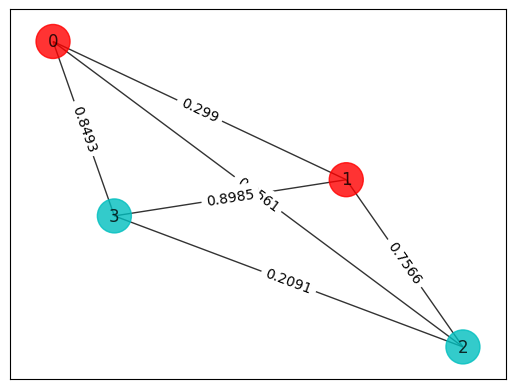

In [3]:
# Calculating optimal partition and plotting
best_cost, best_perm = qubo_min_cost_partition(nr_nodes=n,Q_mat=get_qubo(size=n,edges=edge_list))
colors = ["r" if best_perm[i] == 0 else "c" for i in range(n)]
print("\nBest solution = " + str(best_perm) + " cost = " + str(best_cost))
pos = nx.spring_layout(G)
draw_graph(G, colors, pos)


In [4]:
# Defining instance of QAOA ansatz
QAOA_objective = ADAPTIVEQAOAansatz(n_qubits=n,w_edges=edge_list, backend="SYMQ", precision=64)

In [5]:
QAOA_objective.set_circuit(theta=[0,0,0,0])

ValueError: Invalid Pauli string: Y - should have appropriate length and only contain I,X,Y,Z

In [11]:
# Number of repetitions of (cost, mixer) in circuit
layers=2

# Initial guess for parameters (beta, gamma) of circuit
np.random.seed(0)
theta_min, theta_max = -np.pi, np.pi
theta_i = np.random.uniform(low=theta_min, high=theta_max, size=2*layers)

# ------ Optimizer run ------ #

# Optimizer technique 1)
#_available_methods_ = ['Nelder-Mead', 'Powell', 'COBYLA', 'trust-constr']
#res = sc.optimize.minimize(fun=QAOA_objective.evaluate_circuit, x0=theta_i,method=_available_methods_[2])

# Optimizer technique 2)
#res = sc.optimize.basinhopping(func=QAOA_objective.evaluate_circuit, x0=theta_i, niter=10, stepsize=0.75)

# Optimizer technique 3)
#_available_strategies_ = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp', 'rand2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']
#res = sc.optimize.differential_evolution(func=QAOA_objective.evaluate_circuit,bounds=[(theta_min, theta_max) for angle in theta_i], strategy=_available_strategies_[1],popsize=2, maxiter=50)

# Optimizer technique 4)
_available_sampling_methods_ = ['simplicial', 'halton', 'sobol']
res = sc.optimize.shgo(func=QAOA_objective.evaluate_circuit, bounds=[(theta_min, theta_max) for angle in theta_i], sampling_method=_available_sampling_methods_[2])

# Optimizer technique 5)
#res = sc.optimize.dual_annealing(func=QAOA_objective.evaluate_circuit, bounds=[(theta_min, theta_max) for angle in theta_i], maxfun=1000)

# Optimizer technique 6)
#res = sc.optimize.direct(func=QAOA_objective.evaluate_circuit, bounds=[(theta_min, theta_max) for angle in theta_i], maxfun=400)

# Final parameters (beta, gamma) for circuit
theta_f = res.x.tolist()
res

(16, 1)
[[ 0.24597436-0.04468337j]
 [-0.00581143-0.24993243j]
 [-0.07770228+0.23761807j]
 [ 0.19050894-0.16188371j]
 [ 0.24548306-0.04730812j]
 [-0.05315528-0.24428366j]
 [-0.22260881+0.11377744j]
 [ 0.24869   -0.02555924j]
 [ 0.24869   -0.02555924j]
 [-0.22260881+0.11377744j]
 [-0.05315528-0.24428366j]
 [ 0.24548306-0.04730812j]
 [ 0.19050894-0.16188371j]
 [-0.07770228+0.23761807j]
 [-0.00581143-0.24993243j]
 [ 0.24597436-0.04468337j]]
[[-1.21690111-0.29830687j]]
[[ 0.24597436-0.04468337j]
 [-0.00581143-0.24993243j]
 [-0.07770228+0.23761807j]
 [ 0.19050894-0.16188371j]
 [ 0.24548306-0.04730812j]
 [-0.05315528-0.24428366j]
 [-0.22260881+0.11377744j]
 [ 0.24869   -0.02555924j]
 [ 0.24869   -0.02555924j]
 [-0.22260881+0.11377744j]
 [-0.05315528-0.24428366j]
 [ 0.24548306-0.04730812j]
 [ 0.19050894-0.16188371j]
 [-0.07770228+0.23761807j]
 [-0.00581143-0.24993243j]
 [ 0.24597436-0.04468337j]]
[[0.+1.52655666e-16j]]
[[ 0.24597436-0.04468337j]
 [-0.00581143-0.24993243j]
 [-0.07770228+0.23761

KeyboardInterrupt: 

In [ ]:
plot_histogram(QAOA_objective.set_circuit(theta=theta_f).get_state_probabilities(reverse_states=True))

In [38]:
test = ('X')
''.join(test)

'X'